<b>We generally start our code by importing the liberaries which we will throughout the programe.</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

<b>Now we will load the data that we will be using to train our model</b>

Here we are using [digit dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) dataset which is available in the sklearn liberary itself.

In [2]:
from sklearn.datasets import load_digits
df = load_digits(n_class=10)

In [3]:
print(df.DESCR)  # Info about the dataset

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
pd.DataFrame(df.data)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [6]:
digits = df.data
print(digits.shape)
digits=digits/16.0

(1797, 64)


In [10]:
labels = df.target
labels   # There are total 10 labels (number from 0-9)
print(labels.size)

1797


<b>In this case the dataset contains images of handwritten digits, which are represented using 64 numbers. Each number represent a pixel value of the image and the size of the image is 8X8.</b>

> <b>NOTE:</b> The sizd of the image is 8X8, this information we got from the df.DESCR. We can never say without prior knowledge that what is the size pf the image as 64 pixel values could also mean 16X4.

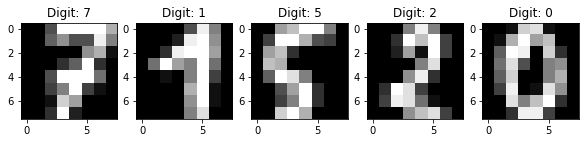

In [12]:
# Plotting to viisualize the data using matplotlib

plt.figure(figsize=(10,10))
for j in range(0,5):
  i = np.random.randint(0,digits.shape[0]+1)
  arr = digits[i]
  arr = np.reshape(arr, (8,8))
  plt.subplot(1,5,j+1)
  plt.imshow(arr, cmap='gray')
  plt.title(f"Digit: {labels[i]}")

<b>We never train the model on all the data that we have, we always make sure to atleast have a test dataset, which is different from the training dataset.</b>

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(digits, labels, test_size = 0.2)

In [23]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')   # We use this line to ignore all the futurewarnings 
                                    # and different kind of warnings that we may get

reg = LogisticRegression(max_iter=100)  # Create an instance of the LogisticRegression
reg.fit(X_train, Y_train)

LogisticRegression()

<b>Check the accuracy of the model by testing it on the test dataset.</b>

In [24]:
from sklearn.metrics import accuracy_score

predictions = reg.predict(X_test)
score =accuracy_score(predictions, Y_test)
score

0.9472222222222222

<b>Plotting to visualize our results.</b>

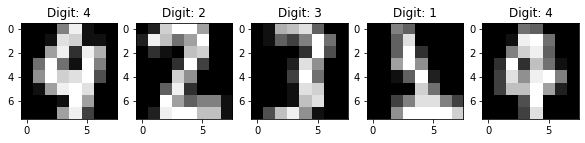

In [25]:
plt.figure(figsize=(10,10))
for j in range(0,5):
  i = np.random.randint(0,X_test.shape[0]+1)
  arr = X_test[i]
  arr = np.reshape(arr, (8,8))
  plt.subplot(1,5,j+1)
  plt.imshow(arr, cmap='gray')
  plt.title(f"Digit: {predictions[i]}")